# 데이터 이해와 시각화

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 2s (5,327 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123105 files and di

**런타임 재시작 필요**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
SEED = 201913992

plt.rc('font', family='NanumBarunGothic')

In [ ]:
df = pd.read_csv("fifa_2023.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10000 non-null  int64 
 1   name        10000 non-null  object
 2   rating      10000 non-null  int64 
 3   card_type   10000 non-null  object
 4   position    10000 non-null  object
 5   nation      10000 non-null  object
 6   league      9621 non-null   object
 7   team        9650 non-null   object
 8   PAC         10000 non-null  int64 
 9   SHO         10000 non-null  int64 
 10  PAS         10000 non-null  int64 
 11  DRI         10000 non-null  int64 
 12  DEF         10000 non-null  int64 
 13  PHY         10000 non-null  int64 
dtypes: int64(8), object(6)
memory usage: 1.1+ MB


In [ ]:
df.head()

,Unnamed: 0,name,rating,card_type,position,nation,league,team,PAC,SHO,PAS,DRI,DEF,PHY
0,0,Lionel Messi,98,team-of-the-season,ST,Argentina,Ligue 1 Uber Eats,Paris SG,94,97,96,99,40,79
1,1,Lionel Messi,98,team-of-the-year,RW,Argentina,Ligue 1 Uber Eats,Paris SG,93,98,97,99,40,77
2,2,Pelé,98,icon,CAM,Brazil,Icons,Icons,95,96,93,96,60,76
3,3,Jude Bellingham,97,award-winner,CM,England,Bundesliga,Borussia Dortmund,90,90,94,98,93,94
4,4,Victor Osimhen,97,award-winner,ST,Nigeria,Serie A TIM,Napoli,99,97,82,94,55,95


In [ ]:
df.isnull().sum()

Unnamed: 0      0
name            0
rating          0
card_type       0
position        0
nation          0
league        379
team          350
PAC             0
SHO             0
PAS             0
DRI             0
DEF             0
PHY             0
dtype: int64

In [ ]:
df

,Unnamed: 0,name,rating,card_type,position,nation,league,team,PAC,SHO,PAS,DRI,DEF,PHY
0,0,Lionel Messi,98,team-of-the-season,ST,Argentina,Ligue 1 Uber Eats,Paris SG,94,97,96,99,40,79
1,1,Lionel Messi,98,team-of-the-year,RW,Argentina,Ligue 1 Uber Eats,Paris SG,93,98,97,99,40,77
2,2,Pelé,98,icon,CAM,Brazil,Icons,Icons,95,96,93,96,60,76
3,3,Jude Bellingham,97,award-winner,CM,England,Bundesliga,Borussia Dortmund,90,90,94,98,93,94
4,4,Victor Osimhen,97,award-winner,ST,Nigeria,Serie A TIM,Napoli,99,97,82,94,55,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,John-Patrick Strauß,67,common,RB,Philippines,Bundesliga 2,Rostock,78,52,61,67,59,63
9996,9996,Noah Loosli,67,rare,CB,Switzerland,Credit Suisse Super League,Grasshopper Club,74,44,44,56,66,77
9997,9997,Robin Becker,67,common,RB,Germany,3. Liga,Dynamo Dresden,74,43,50,60,64,72
9998,9998,Enrico Delprato,67,common,RB,Italy,Calcio B,Parma,74,45,61,61,62,68


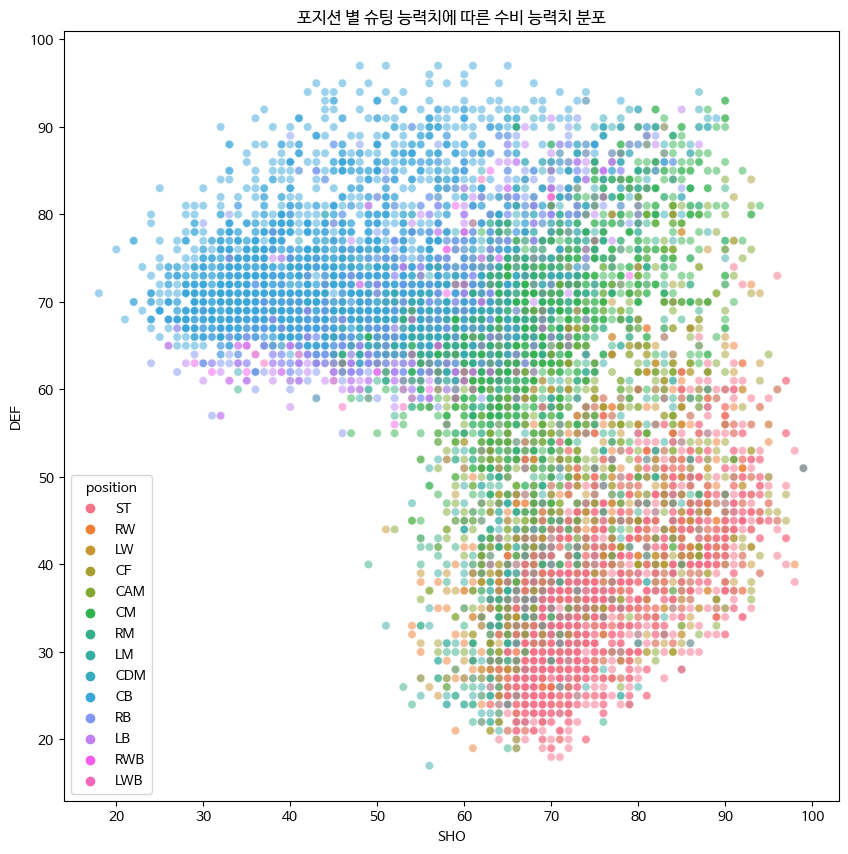

In [ ]:
hue_order = ["ST", "RW", "LW", "CF", "CAM", "CM", "RM", "LM", "CDM", "CB", "RB", "LB", "RWB", "LWB"]

plt.figure(figsize=(10, 10))
sns.scatterplot(df, x="SHO", y="DEF", hue="position", hue_order=hue_order, alpha=0.5)
plt.title("포지션 별 슈팅 능력치에 따른 수비 능력치 분포")
plt.xlabel("SHO")
plt.ylabel("DEF")
plt.show()

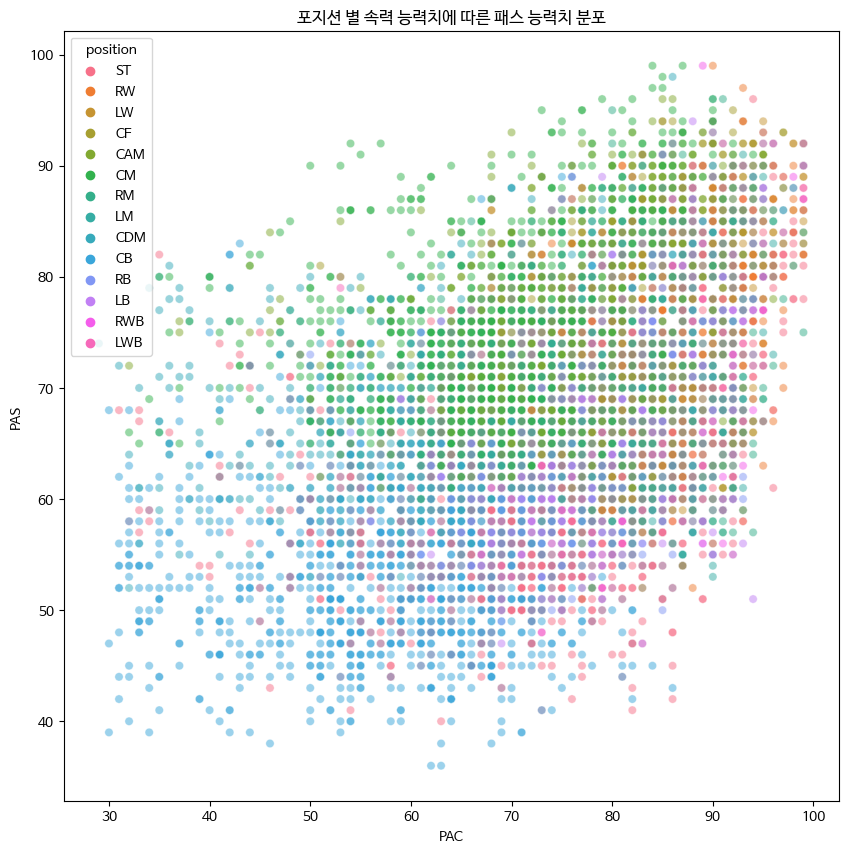

In [ ]:
hue_order = ["ST", "RW", "LW", "CF", "CAM", "CM", "RM", "LM", "CDM", "CB", "RB", "LB", "RWB", "LWB"]

plt.figure(figsize=(10, 10))
sns.scatterplot(df, x="PAC", y="PAS", hue="position", hue_order=hue_order, alpha=0.5)
plt.title("포지션 별 속력 능력치에 따른 패스 능력치 분포")
plt.xlabel("PAC")
plt.ylabel("PAS")
plt.show()

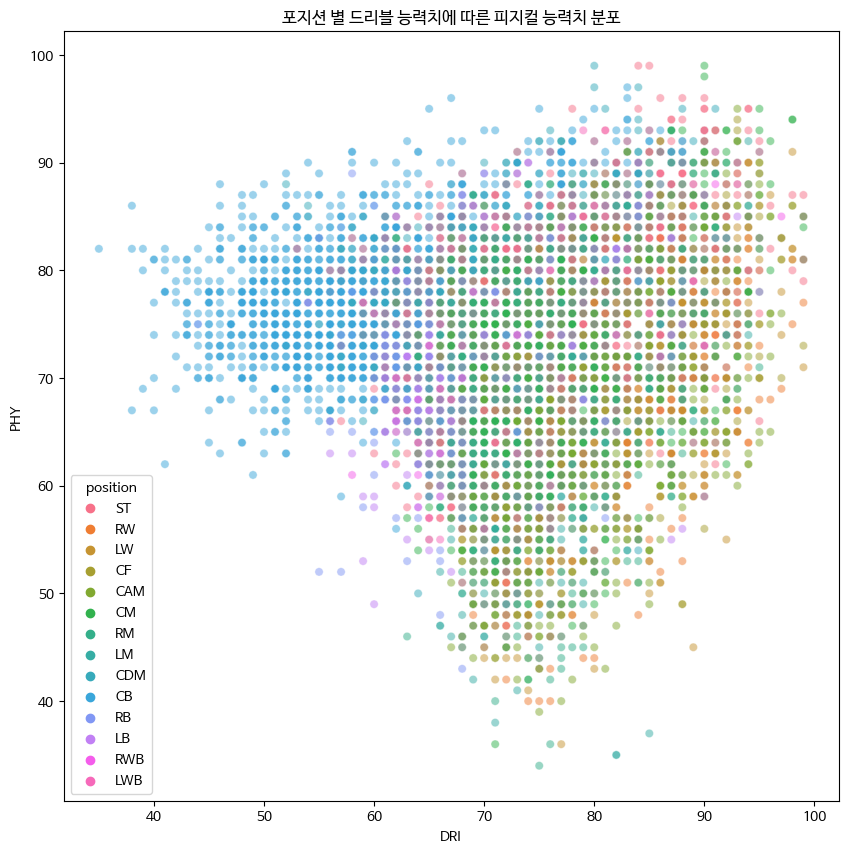

In [ ]:
hue_order = ["ST", "RW", "LW", "CF", "CAM", "CM", "RM", "LM", "CDM", "CB", "RB", "LB", "RWB", "LWB"]

plt.figure(figsize=(10, 10))
sns.scatterplot(df, x="DRI", y="PHY", hue="position", hue_order=hue_order, alpha=0.5)
plt.title("포지션 별 드리블 능력치에 따른 피지컬 능력치 분포")
plt.xlabel("DRI")
plt.ylabel("PHY")
plt.show()

# 데이터 이해를 바탕으로 한 데이터 분석 및 전처리

In [ ]:
data = df[["rating", "PAC", "SHO", "PAS", "DRI", "DEF", "PHY"]]
data

,rating,PAC,SHO,PAS,DRI,DEF,PHY
0,98,94,97,96,99,40,79
1,98,93,98,97,99,40,77
2,98,95,96,93,96,60,76
3,97,90,90,94,98,93,94
4,97,99,97,82,94,55,95
...,...,...,...,...,...,...,...
9995,67,78,52,61,67,59,63
9996,67,74,44,44,56,66,77
9997,67,74,43,50,60,64,72
9998,67,74,45,61,61,62,68


In [ ]:
target = df["position"]
target.unique()

array(['ST', 'RW', 'CAM', 'CM', 'CDM', 'LW', 'CF', 'CB', 'LB', 'RB', 'RM',
       'LWB', 'RWB', 'LM'], dtype=object)

In [ ]:
target.replace(["ST", "RW", "LW", "CF"], "FW", inplace=True)
target.replace(["CAM", "CM", "CDM", "RM", "LM"], "MF", inplace=True)
target.replace(["CB", "LB", "RB", "LWB", "RWB"], "DF", inplace=True)
target

0       FW
1       FW
2       MF
3       MF
4       FW
        ..
9995    DF
9996    DF
9997    DF
9998    DF
9999    DF
Name: position, Length: 10000, dtype: object

# 문제 해결을 위한 알고리즘

In [ ]:
# 훈련 세트 및 테스트 세트 분류
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=SEED)

In [ ]:
# 훈련 세트 및 테스트 세트 크기 확인
print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(8000, 7) (8000,)
(2000, 7) (2000,)


In [ ]:
# 랜덤 서치를 위한 확률 분포 객체 만들기
from scipy.stats import uniform, randint

params = {
    'min_impurity_decrease': uniform(0.0001, 0.001),
    'max_depth': randint(20, 50),
    'min_samples_split': randint(2, 50),
    'min_samples_leaf': randint(1, 50),
    }

In [ ]:
# 랜덤 서치 객체 만들기
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
gs = RandomizedSearchCV(DecisionTreeClassifier(random_state=SEED), params,
                        n_iter=500, n_jobs=-1, random_state=SEED)
gs.fit(train_input, train_target)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=201913992),
                   n_iter=500, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ce09f073910>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7ce09f072740>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ce09f071db0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ce09f071000>},
                   random_state=201913992)

In [ ]:
# 최적의 매개변수 조합 출력
print(gs.best_params_)

{'max_depth': 46, 'min_impurity_decrease': 0.00017379565355599006, 'min_samples_leaf': 17, 'min_samples_split': 34}


In [ ]:
# 최고 교차 검증 점수
print(np.max(gs.cv_results_['mean_test_score']))

0.8084999999999999


# 성능 평가

In [ ]:
dt = gs.best_estimator_
print(dt.score(test_input, test_target))

0.8075
